In [95]:
# Load PNC to make VAE autoencoder

import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC'

pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

age = []
rest = []

for sub in pncdemo['age_at_cnb']:
    try:
        a = pncdemo['age_at_cnb'][sub]
        p = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        rest.append(p)
        age.append(a)
    except:
        pass

rest = np.stack(rest)
age = np.array(age)

print(len(rest), len(age))

1456 1456


In [160]:
import torch
import torch.nn as nn
import torch.nn.functional as F

szA = 3000
szB = 1000

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fwd1 = nn.Linear(34716,szA).float().cuda()
        self.fwd2mu = nn.Linear(szA,szB).float().cuda()
        self.fwd2sigma = nn.Linear(szA,szB).float().cuda()
        self.rev1 = nn.Linear(szB,szA).float().cuda()
        self.rev2 = nn.Linear(szA,34716).float().cuda()

    def gen(self, mu, sigma):
        z = mu+sigma*torch.randn(mu.shape[0],szB).float().cuda()
        x = F.relu(self.rev1(z))
        x = self.rev2(x)
        return x, z

    def forward(self, x):
        x = F.relu(self.fwd1(x))
        mu = self.fwd2mu(x)
        sigma = self.fwd2sigma(x)
        x, z = self.gen(mu, sigma)
        return x, z, mu, sigma

def kl(mu, sigma):
    return 0.5*torch.mean(mu**2 + sigma**2 - 1 - torch.log(sigma**2+0.0001))

def rmse(y, yhat):
    return torch.mean((y-yhat)**2)**0.5

x_t = torch.from_numpy(rest).float().cuda()
age_t = torch.from_numpy(age).float().cuda()

vae = VAE()
optim = torch.optim.Adam(list(vae.parameters()), lr=1e-4, weight_decay=1e-4)

nepochs = 5000
pperiod = 50

for e in range(nepochs):
    idcs = np.random.permutation(len(x_t))[:200]
    optim.zero_grad()
    xhat, z, mu, sigma = vae(x_t[idcs])
    rloss = rmse(xhat, x_t[idcs])
    klloss = kl(mu, sigma)
    (8*rloss+klloss).backward()
    optim.step()
    if e%pperiod == 0 or e == nepochs-1:
        print(f'{e} {rloss} {klloss}')

print('Complete')

0 0.3475308120250702 2.5566415786743164
50 0.19876474142074585 0.10133574157953262
100 0.18715859949588776 0.08727346360683441
150 0.17272226512432098 0.07813046127557755
200 0.17490758001804352 0.06085401028394699
250 0.17060549557209015 0.0509919598698616
300 0.16741260886192322 0.0494055449962616
350 0.16706474125385284 0.04326533526182175
400 0.16920216381549835 0.039345335215330124
450 0.1647321879863739 0.0362514965236187
500 0.16707278788089752 0.03877894580364227
550 0.16598737239837646 0.03558364510536194
600 0.16190584003925323 0.03650069609284401
650 0.1650150716304779 0.03631746396422386
700 0.1623678356409073 0.03664803132414818
750 0.1589025855064392 0.036946240812540054
800 0.15910987555980682 0.0355159156024456
850 0.15687346458435059 0.03516244515776634
900 0.15936927497386932 0.03794364258646965
950 0.15489818155765533 0.0404110811650753
1000 0.15545804798603058 0.040727365761995316
1050 0.15376222133636475 0.039963249117136
1100 0.15493251383304596 0.0397909060120582

In [161]:
with torch.no_grad():
    mu = torch.zeros(10,szB).float().cuda()
    sigma = torch.ones(10,szB).float().cuda()
    x, z = vae.gen(mu, sigma)
    x = x.detach().cpu().numpy()

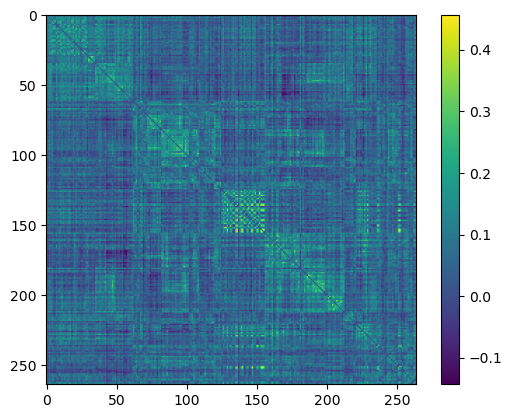

In [163]:
plt.imshow(remap(vec2mat(x[8])))
plt.colorbar()
plt.show()

In [10]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


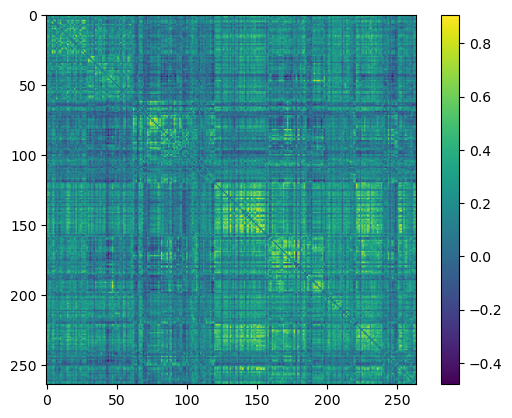

In [155]:
import matplotlib.pyplot as plt

plt.imshow(remap(vec2mat(x_t[idcs[4]].detach().cpu().numpy())))
# plt.imshow(remap(vec2mat(xhat[4].detach().cpu().numpy())))
plt.colorbar()
plt.show()

In [146]:
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(szB,1).float().cuda()

    def forward(self, x):
        x = self.fc1(x).squeeze()
        return x

with torch.no_grad():
    fc, z, mu, _ = vae(x_t)

nepochs = 5000
pperiod = 200

for i in range(10):
    idcs = np.random.permutation(len(x_t))
    tr = idcs[:1000]
    te = idcs[1000:]

    reg = Regressor()
    optim = torch.optim.Adam(reg.parameters(), lr=1e-4, weight_decay=1e-3)

    for e in range(nepochs):
        optim.zero_grad()
        yhat = reg(mu[tr])
        loss = rmse(age_t[tr], yhat)
        loss.backward()
        optim.step()
        if e%pperiod == 0 or e == nepochs-1:
            print(f'{e} {loss}')
    
    print('Complete')
    
    with torch.no_grad():
        yhat = reg(mu[te])
        loss = rmse(age_t[te], yhat)
        print(loss)

0 14.826499938964844
200 14.162583351135254
400 13.560660362243652
600 13.01673412322998
800 12.526398658752441
1000 12.08409309387207
1200 11.68364429473877
1400 11.318879127502441
1600 10.983656883239746
1800 10.672101974487305
2000 10.379035949707031
2200 10.100269317626953
2400 9.832653045654297
2600 9.573952674865723
2800 9.322635650634766
3000 9.077676773071289
3200 8.838411331176758
3400 8.604438781738281
3600 8.375540733337402
3800 8.151650428771973
4000 7.932803153991699
4200 7.719110012054443
4400 7.5107340812683105
4600 7.307869911193848
4800 7.110729217529297
4999 6.920466423034668
Complete
tensor(7.2879, device='cuda:0')
0 14.832548141479492
200 14.177783966064453
400 13.5789794921875
600 13.033254623413086
800 12.53640079498291
1000 12.08368968963623
1200 11.669913291931152
1400 11.289670944213867
1600 10.937854766845703
1800 10.609890937805176
2000 10.30179214477539
2200 10.010170936584473
2400 9.732229232788086
2600 9.465731620788574
2800 9.208938598632812
3000 8.960533

KeyboardInterrupt: 